<a href="https://colab.research.google.com/github/DsStudentSid/InitialPaythonAssignments/blob/master/capstone-group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install mysql-connector-python

In [43]:
import mysql.connector as ms

cnx = ms.connect(host='cpanel.insaid.co',user='student', password='student',database='Capstone1')
cursor = cnx.cursor()

cursor.execute("SHOW TABLES")

tables = cursor.fetchall() ## it returns list of tables present in the database

## showing all the tables one by one
for table in tables:
    print(table)


('events_data',)
('gender_age_train',)
('phone_brand_device_model',)


**Gender Age Table**

In [44]:
sql_select_Query = ("select * from gender_age_train")
cursor.execute(sql_select_Query)
print(cursor)
gender_age_data=cursor.fetchall()
print(gender_age_data[0])

CMySQLCursor: select * from gender_age_train
(-8076087639492063270, 'M', 35, 'M32-38')


In [0]:
#for x in gender_age_data:
#  print(x)

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [47]:
gender_age_df = pd.DataFrame(gender_age_data)
column_names = [i[0] for i in cursor.description]

gender_age_df.columns = column_names
len(gender_age_df)

74645

In [48]:
gender_age_df.to_csv("gender_age.csv")
gender_age_df.columns

Index(['device_id', 'gender', 'age', 'group'], dtype='object')

In [49]:
gender_age_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [50]:
gender_age_df.dtypes

device_id     int64
gender       object
age           int64
group        object
dtype: object

In [51]:
gender_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [52]:
gender_age_df.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [53]:
gender_age_df.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [54]:
gender_age_df.group.value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

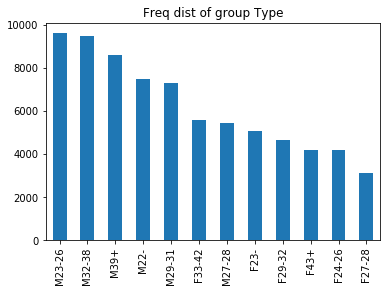

In [55]:
gender_age_df['group'].value_counts().plot.bar(title='Freq dist of group Type')




**Phone brand device Table**



In [56]:
device_select_Query = ("select * from phone_brand_device_model")
cursor.execute(device_select_Query)
print(cursor)
phone_brand_device=cursor.fetchall()
print(phone_brand_device[0])

CMySQLCursor: select * from phone_brand_device_model
(1877775838486905855, 'vivo', 'Y13')


In [57]:
phone_brand_df = pd.DataFrame(phone_brand_device)
column_names = [i[0] for i in cursor.description]

phone_brand_df.columns = column_names
len(phone_brand_df)

87726

In [58]:
phone_brand_df.to_csv("phone_brand.csv")
phone_brand_df.columns

Index(['device_id', 'phone_brand', 'device_model'], dtype='object')

In [59]:
phone_brand_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [60]:
phone_brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [61]:
phone_brand_df.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [62]:
phone_brand_df.device_model.unique()

array(['Y13', 'V183', 'R7s', ..., 'Galaxy Tab S T705', 'IVO 8800',
       'U59GT'], dtype=object)

In [64]:
df3 = pd.merge(gender_age_df, phone_brand_df)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 6 columns):
device_id       74617 non-null int64
gender          74617 non-null object
age             74617 non-null int64
group           74617 non-null object
phone_brand     74617 non-null object
device_model    74617 non-null object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


In [65]:
df3.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,三星,Galaxy S4
4,245133531816851882,M,30,M29-31,SUGAR,时尚手机


**Event Data table**

In [66]:
#To load Event data Frame
sql_select_Query = ("select * from events_data")
cursor.execute(sql_select_Query)
print(cursor)
Event_Data=cursor.fetchall()
print(Event_Data[0])

CMySQLCursor: select * from events_data
(1, 29182687948017175, datetime.datetime(2016, 5, 1, 0, 55, 25), 77.266052, 28.68161, 'Delhi', 'Delhi')


In [0]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [104]:
#link = 'https://drive.google.com/open?id=1nlZw1xzY3tW8TlKJL18yMCfi3T6Eo9o_' # The shareable link
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='

1nlZw1xzY3tW8TlKJL18yMCfi3T6Eo9o_


In [0]:
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('events_data_file.csv')  
#event_data_df = pd.read_csv('events_data_file.csv')
# Dataset is now stored in a Pandas Dataframe

In [67]:
event_data_df = pd.DataFrame(Event_Data)
column_names = [i[0] for i in cursor.description]

event_data_df.columns = column_names
len(event_data_df)


3252950

In [68]:
event_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1,2.918269e+16,2016-05-01 00:55:25,77.266052,28.68161,Delhi,Delhi
1,7104,2.918269e+16,2016-05-02 09:37:02,77.266052,28.68161,Delhi,Delhi
2,29661,2.918269e+16,2016-05-04 00:56:04,77.266052,28.68161,Delhi,Delhi
3,33133,2.918269e+16,2016-05-06 05:01:15,77.266052,28.68161,Delhi,Delhi
4,38980,2.918269e+16,2016-05-06 09:55:04,77.266052,28.68161,Delhi,Delhi


In [69]:
event_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    datetime64[ns]
longitude    float64
latitude     float64
city         object
state        object
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 173.7+ MB


In [70]:
event_data_df.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780170e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [71]:
sum(pd.isnull(event_data_df['longitude']))

423

In [72]:
sum(pd.isnull(event_data_df['latitude']))

423

In [73]:
sum(pd.isnull(event_data_df['state']))


0

In [74]:
sum(pd.isnull(event_data_df['city']))

0

In [0]:
#new_event_data_df = event_data_df.copy() 

In [114]:
#new_event_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [75]:
pip install geopy

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="test")

In [0]:
# Here trying to get rid of Null value of longitude it's not working now


#new_event_data_df['longitude'].apply(get_rid_of_nulls)
#new_event_data_df['longitude'] = new_event_data_df.longitude.apply(lambda x: x if not pd.isnull(x) else geolocator.geocode('Delhi').longitude)

In [0]:
#sum(pd.isnull(new_event_data_df['longitude']))

In [0]:
#df4 = pd.merge(df3, event_data_df)
#df4.info()

In [0]:
#df4.head()

In [0]:
#df4.describe()

In [0]:
#df4.device_id.unique()

In [85]:
dfnew = pd.merge(df3, event_data_df, on='device_id', how='right')
dfnew.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-6.552729e+15,M,28.0,M27-28,vivo,X3T,189757,2016-05-07 21:40:38,78.487473,17.338947,Rajendranagar,AndhraPradesh
1,-6.552729e+15,M,28.0,M27-28,vivo,X3T,190875,2016-05-04 22:31:06,78.487473,17.338947,Rajendranagar,AndhraPradesh
2,-6.552729e+15,M,28.0,M27-28,vivo,X3T,236452,2016-05-04 21:45:10,78.487473,17.338947,Rajendranagar,AndhraPradesh
3,-6.552729e+15,M,28.0,M27-28,vivo,X3T,237777,2016-05-04 22:33:57,78.487473,17.338947,Rajendranagar,AndhraPradesh
4,-6.552729e+15,M,28.0,M27-28,vivo,X3T,289077,2016-05-04 21:14:14,78.487473,17.338947,Rajendranagar,AndhraPradesh


In [86]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
device_id       float64
gender          object
age             float64
group           object
phone_brand     object
device_model    object
event_id        int64
timestamp       datetime64[ns]
longitude       float64
latitude        float64
city            object
state           object
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 322.6+ MB


In [87]:
dfnew.phone_brand.value_counts()

三星      4704
小米      4403
华为      2116
vivo    1781
OPPO    1103
魅族       955
酷派       759
HTC      336
乐视       287
优米       194
天语        92
普耐尔       40
波导        38
一加        35
宝捷讯       29
中国移动      21
联想        20
努比亚       18
亿通        17
美图        13
酷比魔方       8
酷比         5
米歌         3
LG         3
朵唯         1
锤子         1
Name: phone_brand, dtype: int64

In [89]:
#Trying to update group column based on range of age column
dfnew['group'] = pd.cut(x=dfnew['age'], bins=[1, 12, 19, 40, 60, 79, 100], labels=['Young', 'Teens', 'Youth', 'MidAge', 'Elderly', 'Old'])
dfnew.drop_duplicates('age')

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-6.552729e+15,M,28.0,Youth,vivo,X3T,189757,2016-05-07 21:40:38,78.487473,17.338947,Rajendranagar,AndhraPradesh
54,-4.973076e+16,M,31.0,Youth,三星,K860i,512,2016-05-04 00:33:56,80.317383,13.176652,Chennai,TamilNadu
387,-2.954377e+17,M,20.0,Youth,小米,ELIFE S5.5,117922,2016-05-02 22:43:46,76.220306,10.561827,Thrissur,Kerala
395,-3.336618e+17,F,24.0,Youth,三星,A788t,150520,2016-05-07 12:21:25,78.141060,9.551846,Aruppukkottai,TamilNadu
443,-1.268112e+17,F,30.0,Youth,小米,红米2A,2841769,2016-05-05 23:27:40,80.345627,13.102865,Chennai,TamilNadu
444,1.647972e+16,F,41.0,MidAge,努比亚,Z7 Mini,207137,2016-05-04 17:44:02,84.187233,27.177624,Bagaha,Bihar
447,8.765877e+18,F,32.0,Youth,三星,Galaxy Grand 2,12768,2016-05-07 12:55:54,75.930756,22.802168,Indore,MadhyaPradesh
917,-8.358875e+15,F,60.0,MidAge,vivo,Y27,43786,2016-05-04 12:14:05,78.176025,12.206610,Dharmapuri,TamilNadu
948,-4.224128e+17,F,22.0,Youth,魅族,魅蓝Note 2,1235648,2016-05-04 00:54:25,78.552063,17.453049,Hyderabad,Telangana
955,-2.581588e+17,F,21.0,Youth,小米,红米note,927089,2016-05-04 12:41:08,83.054253,17.705706,Anakapalle,AndhraPradesh


In [90]:
#To update null values in state column 
print(sum(pd.isnull(dfnew['device_id'])))


#print(sum(pd.isnull(dfnew['state'])))
#print(dfnew[dfnew.state.isnull()])

453


In [91]:
print(sum(pd.isnull(dfnew['age'])))

3235968


In [56]:
#Correaltion b/w all data
# Create correlation matrix
corr_matrix = dfnew.corr().abs()
corr_matrix

,device_id,age,event_id,longitude,latitude
device_id,1.000000,0.030163,0.000655,0.007484,0.018752
age,0.030163,1.000000,0.007682,0.060955,0.153942
event_id,0.000655,0.007682,1.000000,0.002517,0.002552
longitude,0.007484,0.060955,0.002517,1.000000,0.072277
latitude,0.018752,0.153942,0.002552,0.072277,1.000000


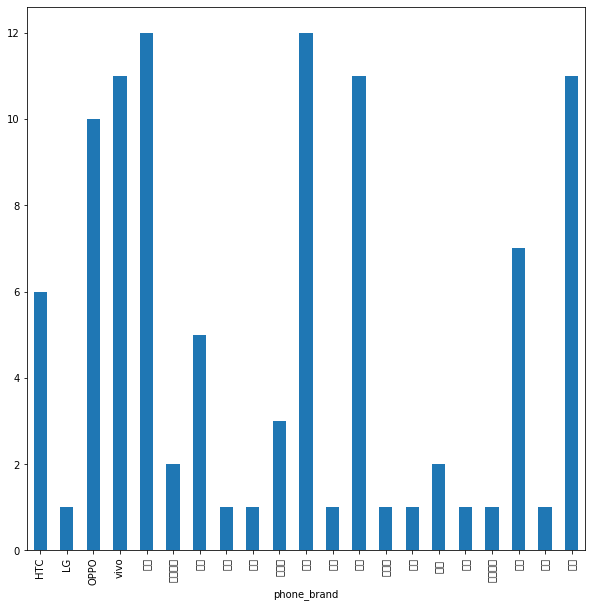

In [57]:
dfnew.groupby('phone_brand')['group'].nunique().plot(kind='bar',figsize = (10, 10))
plt.show()

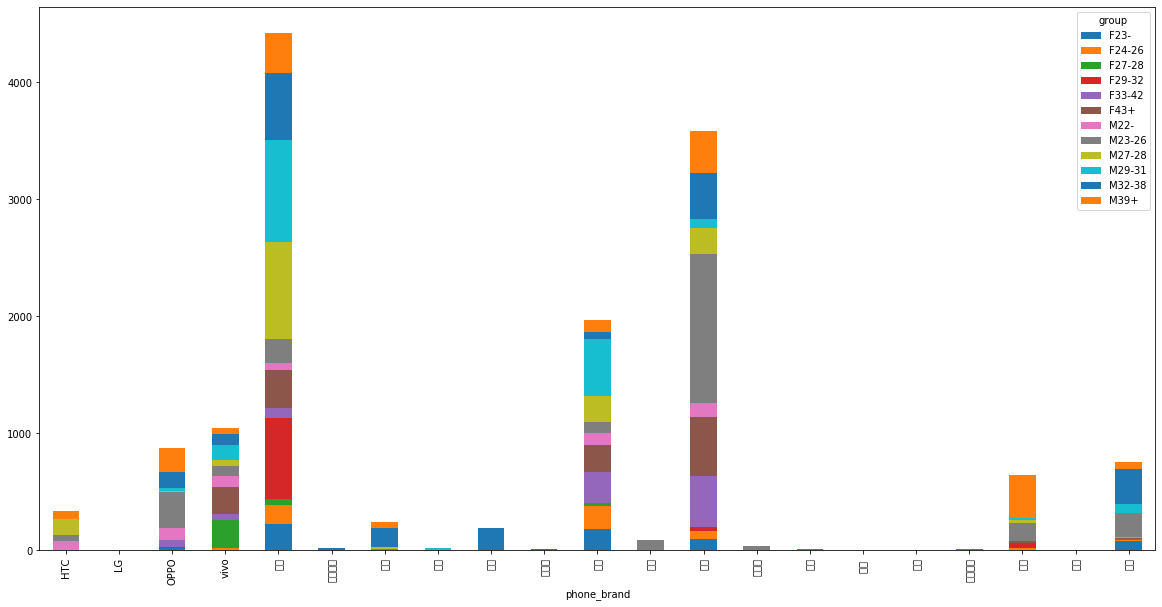

In [58]:
dfnew.groupby(['phone_brand','group']).size().unstack().plot(kind='bar',stacked=True,figsize = (20, 10),legend='true')
plt.show()

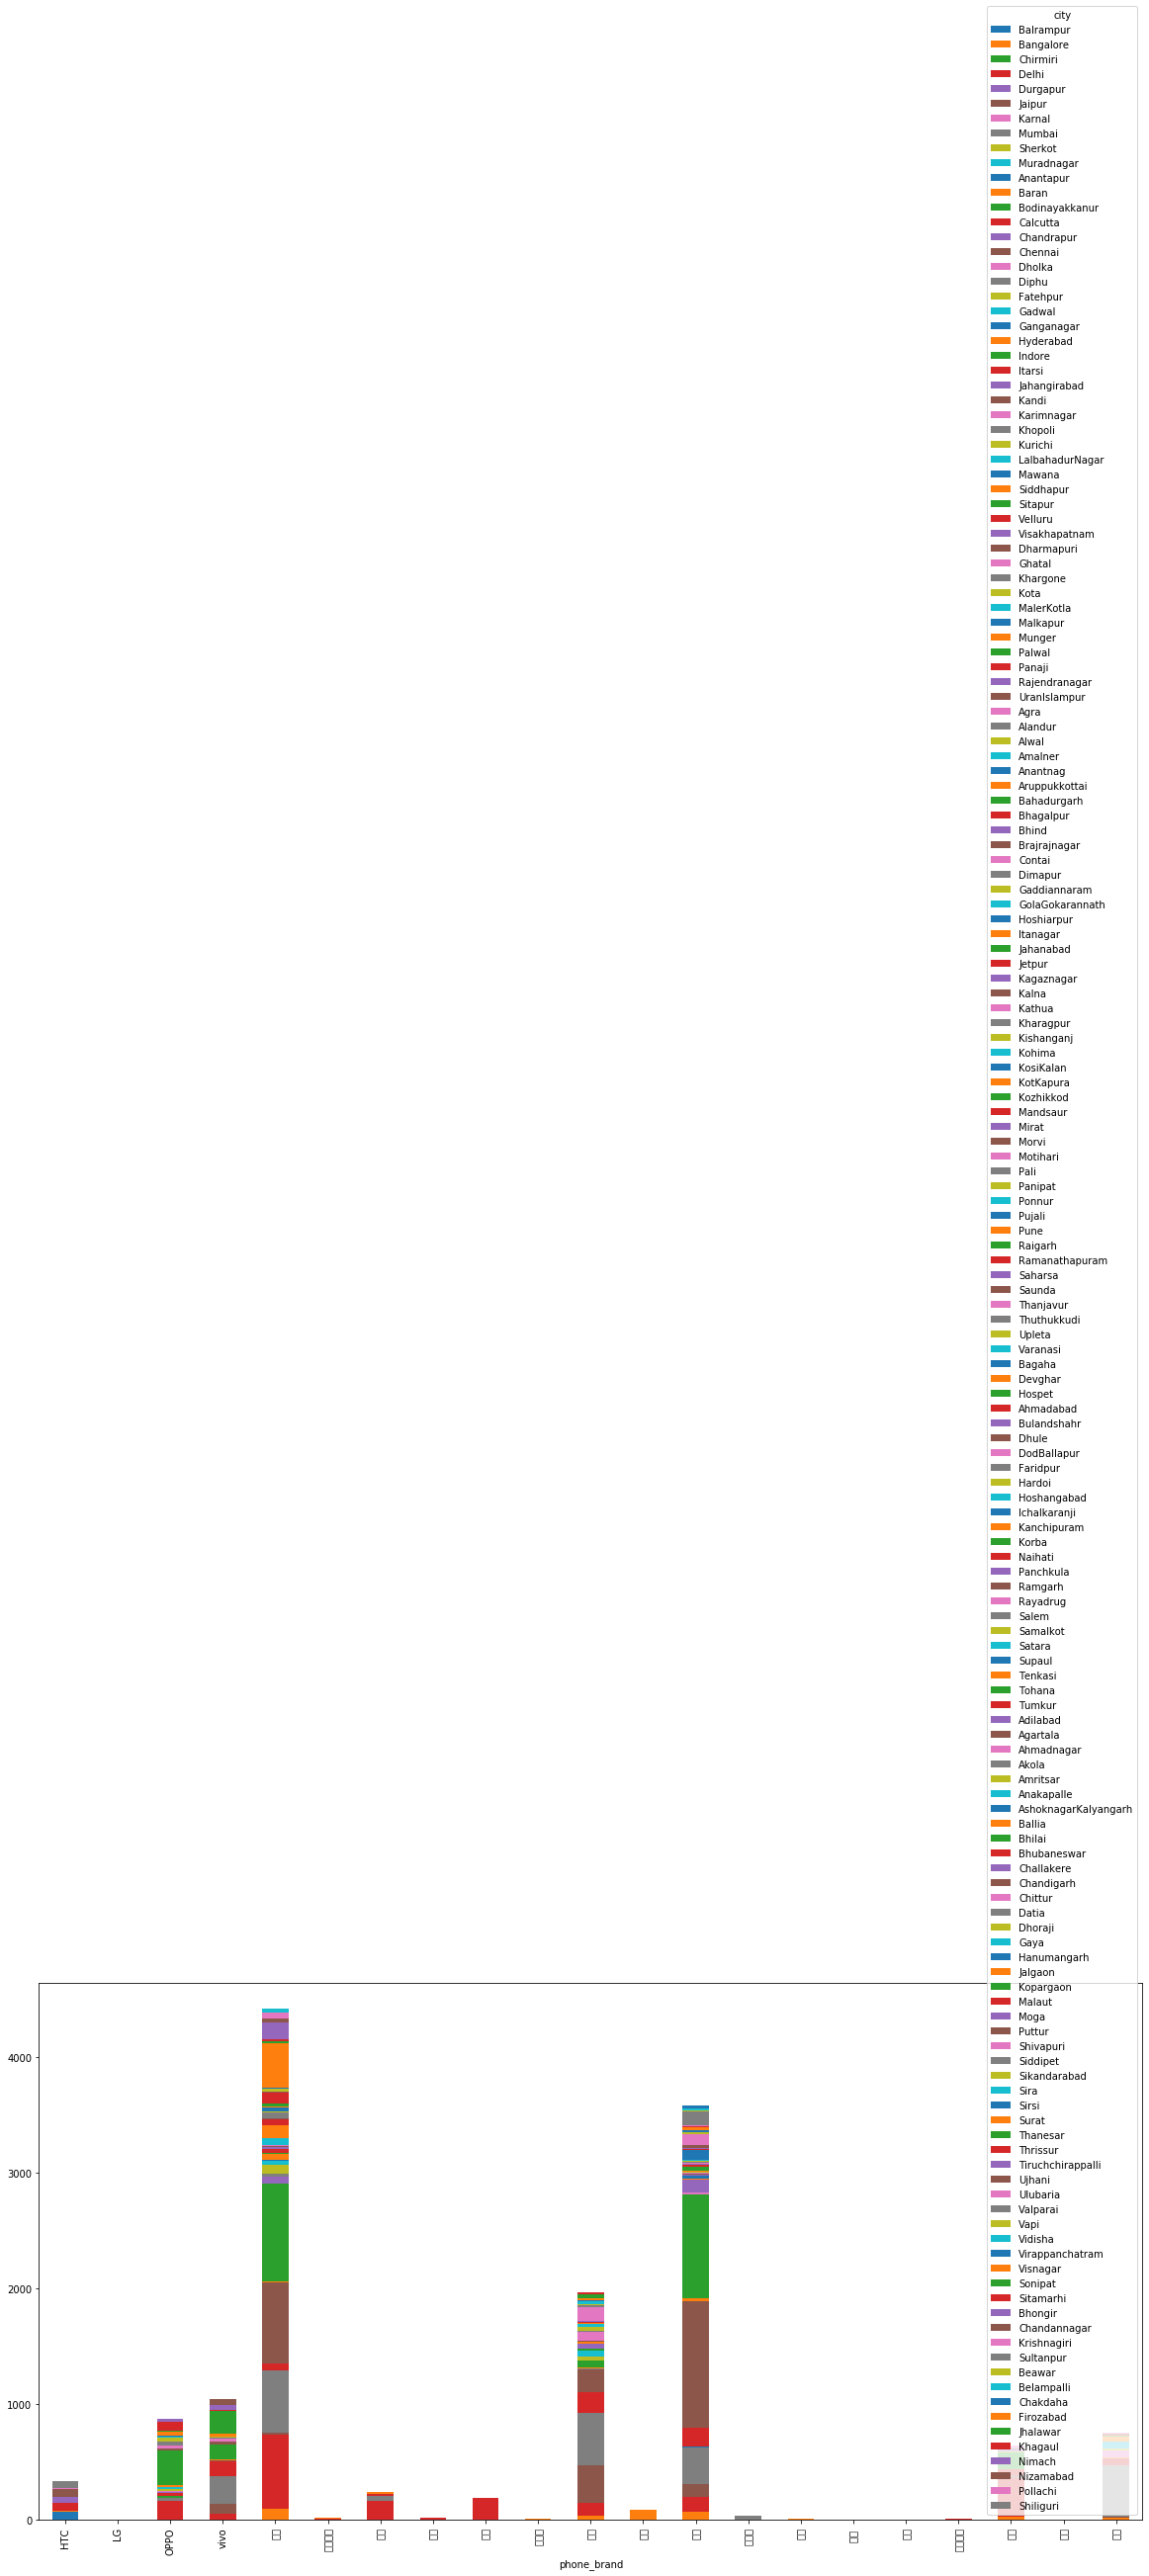

In [59]:
dfnew.groupby(['phone_brand','city']).size().unstack().plot(kind='bar',stacked=True,figsize = (20, 10),legend='true')
plt.show()

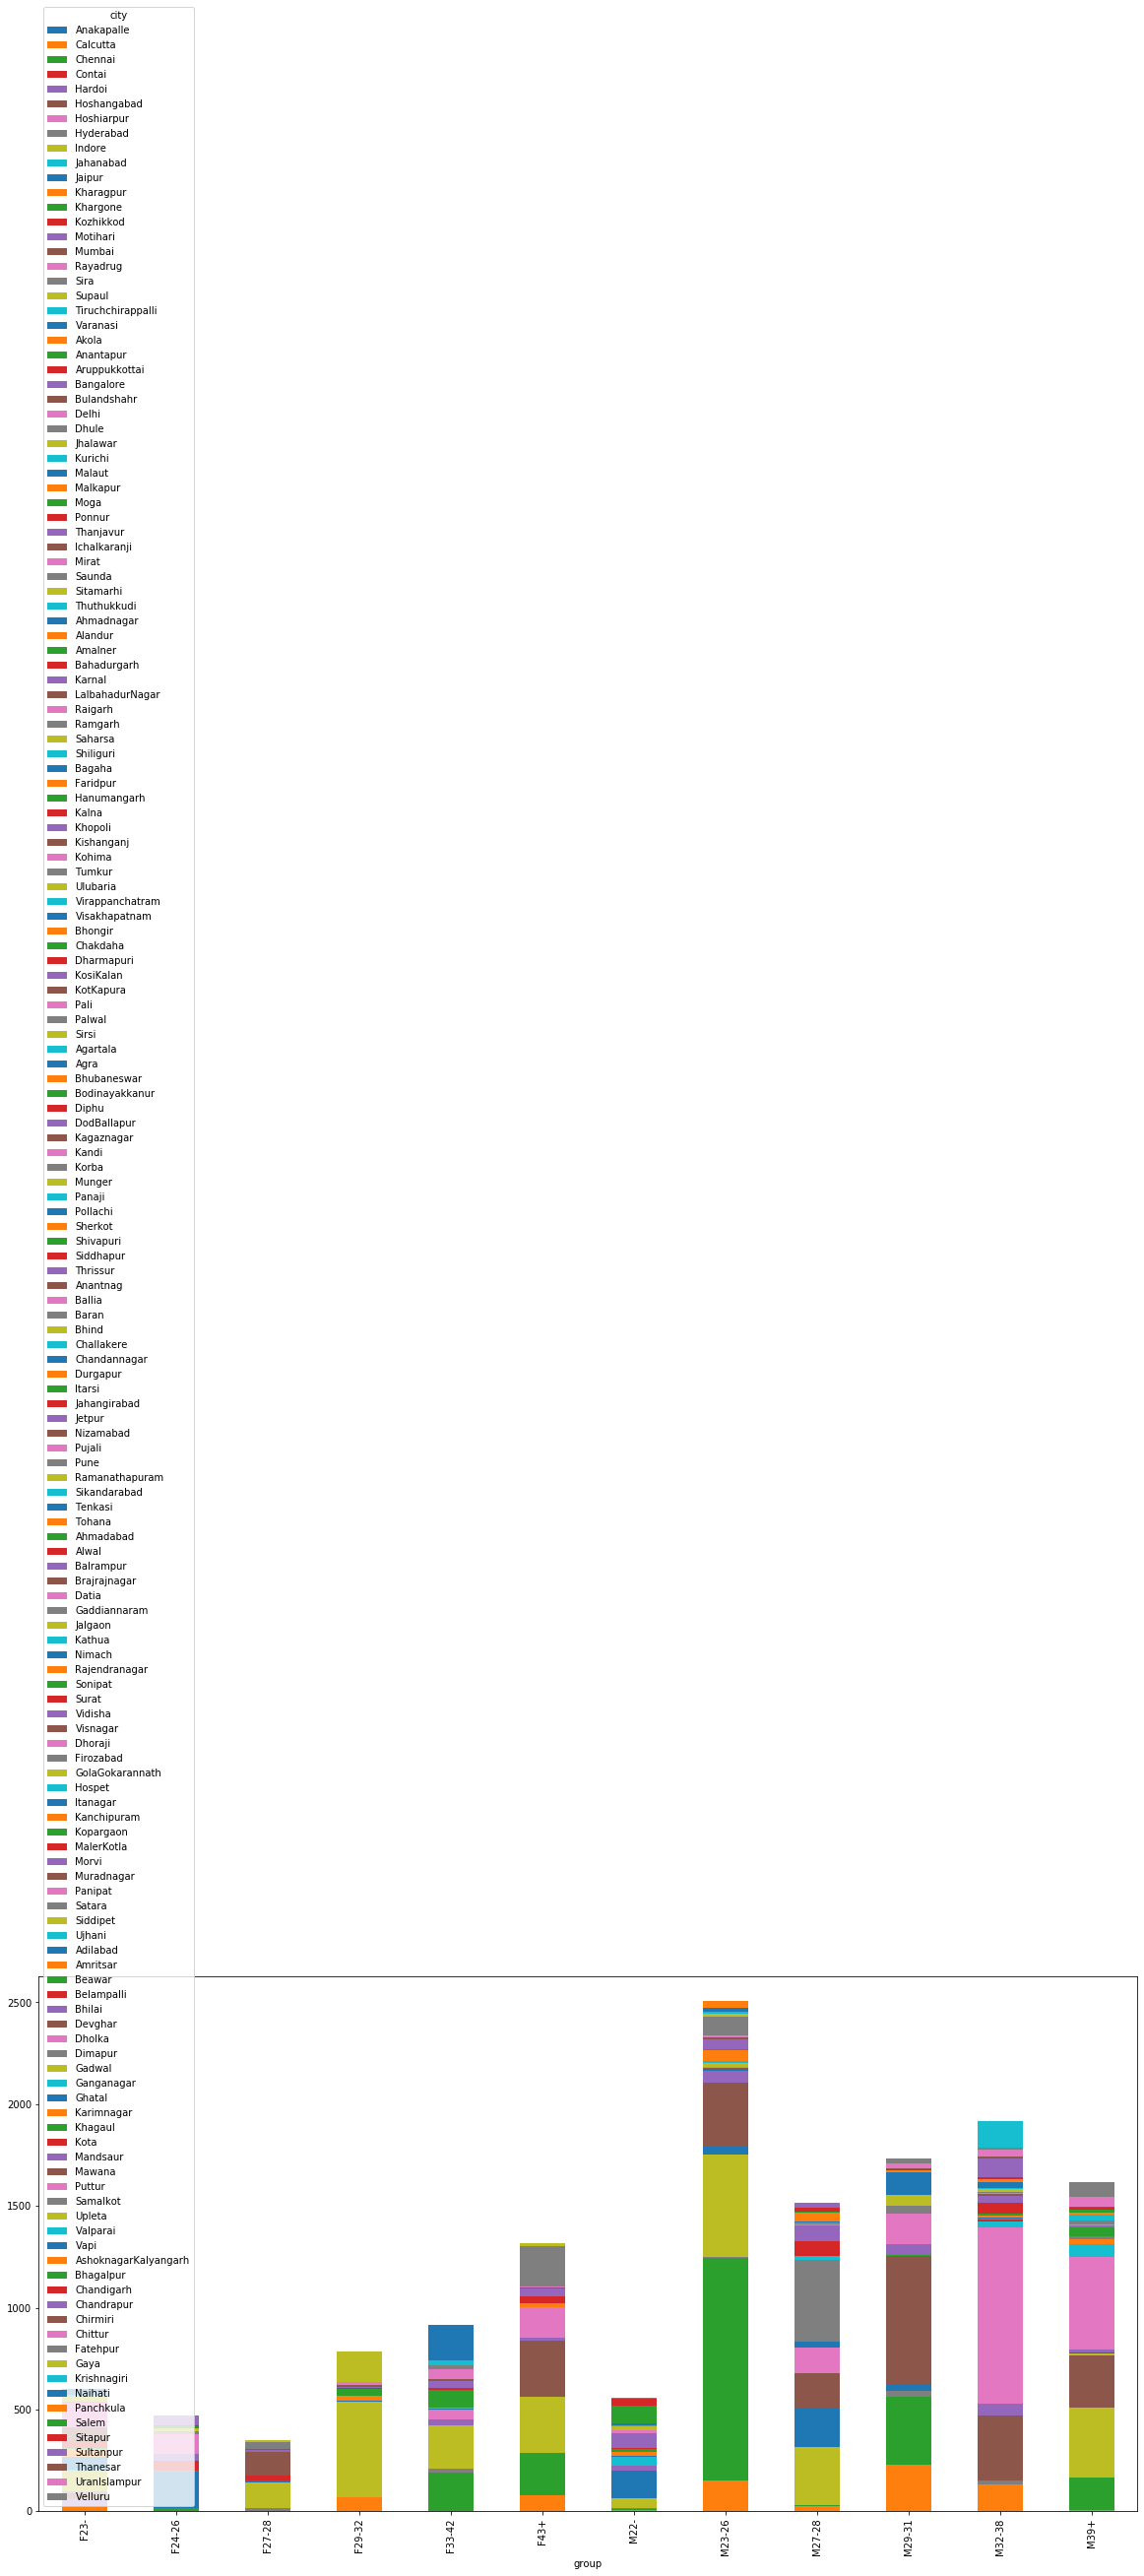

In [60]:
dfnew.groupby(['group','city']).size().unstack().plot(kind='bar',stacked=True,figsize = (20, 10),legend='true')
plt.show()

In [61]:
import folium
from folium import plugins  
latitude = 37.0902
longitude = -95.7129

#m = folium.Map([17.338947, 78.487472], zoom_start=5,width=500,height=500)
traffic_map = folium.Map(location=[latitude, longitude], zoom_start=5)
#stationArr = dfnew[['latitude', 'longitude']].as_matrix()

# plot heatmap
#m.add_children(plugins.HeatMap(stationArr, radius=15))
m

NameError: ignored